## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [3]:
import sys
# assert that Python is of at least 3.8
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np

# Make sure that OpenCV is running on optimized code
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
print(f"Is OpenCV is running on optimized code? {cv.useOptimized()}")

Is OpenCV is running on optimized code? True


In [22]:
def display_images(images, titles, save_filename=None):
    """
    Display images in a single window with given titles.
    
    Args:
    - images: List of images (numpy arrays) to display.
    - titles: List of titles corresponding to each image.
    - save_filename: Optional filename to save the displayed image.
    """
    # Create a window with a grid layout
    num_images = len(images)
    
    # Display images with titles
    for i in range(num_images):
        cv.imshow(titles[i], images[i])
    
    cv.waitKey(0)
    cv.destroyAllWindows()

In [7]:
#Exercise 1
images = cv.imread("images/dog.jfif")
cv.imshow("Original images" , images)
cv.imwrite("dog.png" , images)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
#Exercise 2
img = cv.imread('images/lena.jfif')
img_grayscale = cv.imread('images/lena.jfif', 0)

cv.imshow("original", img)
cv.imshow('grayscale', img_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

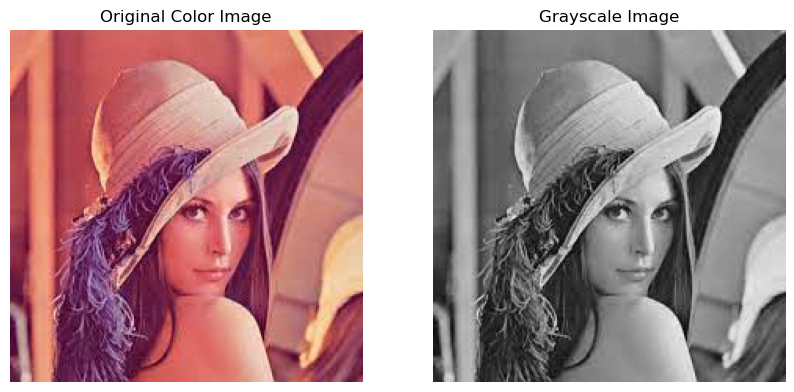

In [9]:
#Exercise 2
import matplotlib.pyplot as plt

img_color = cv.imread('images/lena.jfif')

img_grayscale = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
img_color_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_color_rgb)
plt.title("Original Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

In [11]:
#Exercise 3
# read local video file or access your webcam
cap = cv.VideoCapture("videos/img_pexels.mp4")

# width, height of frame, fourcc, fps
width = int(cap.get(3))
height = int(cap.get(4))
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 20

new_width = width // 4
new_height = height  // 4
new_size = (new_width, new_height)

out = cv.VideoWriter("video_small.avi", fourcc, fps, new_size)

if not cap.isOpened():
    sys.exit("Video file not found")

while cap.isOpened():
    ret, frame = cap.read()

    # condition control
    if not ret:
        print("Frame not received")
        break

    resized_frame = cv.resize(frame, new_size)

    out.write(resized_frame)
    cv.imshow("frame", resized_frame)

    # if user pressed escape, then break
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
  
cap.release()
out.release()
cv.destroyAllWindows()

In [23]:
#Exercise 4 A(Interpolation)

img = cv.imread("images/dog.jfif")
w, h = 250, 450
#img_resize = cv.resize(img, (w, h), interpolation = cv.I)
# Resize using linear interpolation
enlarged_linear = cv.resize(img, new_size, interpolation=cv.INTER_LINEAR)

display_images([img, enlarged_linear], ("original", "resize"))


In [24]:
#Exercise 4 B(Cubic)

img = cv.imread("images/dog.jfif")
fx, fy = 0.6, 0.6
#img_resize = cv.resize(img, (w, h), interpolation = cv.I)
img_resize = cv.resize(img, None, fx=fx, fy=fy)

# Display and save the enlarged image
display_images([img, img_resize], ("original", "resize"))

In [25]:
#Exercise 4 C (Nearest neighbor interpolation.)

# Load the image
img = cv.imread("images/dog.jfif")

# Scale factors for resizing
fx, fy = 0.6, 0.6

# Resize using nearest neighbor interpolation
img_resize = cv.resize(img, None, fx=fx, fy=fy, interpolation=cv.INTER_NEAREST)

# Display and save the enlarged image
display_images([img, img_resize], ("original", "resize"))
